In [2]:
import pandas as pd
import numpy as np

In [21]:
df = pd.read_csv('../predictions.csv')

In [22]:
from sklearn.preprocessing import MinMaxScaler

df['Normalized Observed'] = MinMaxScaler().fit_transform(df[['Observed log(TX/Txref)']])

In [23]:
def padded_one_hot_encode(sequence):
    mapping = {'A': [1,0,0,0], 'C': [0,1,0,0], 'G': [0,0,1,0], 'T': [0,0,0,1], '0': [0,0,0,0]}
    encoding = []
    for nucleotide in sequence:
         encoding += [mapping[nucleotide]]
    return encoding


X = df[['UP', 'h35', 'spacs', 'h10', 'disc', 'ITR']]
y = df['Normalized Observed']

upstream_padding = {}
for col in X.columns:
    max_len = X[col].apply(len).max()
    upstream_padding[col] = np.array([padded_one_hot_encode('0' * (max_len - len(seq)) + seq) for seq in X[col]])

X = np.concatenate([upstream_padding[col] for col in X.columns], axis=1)

In [25]:
from keras.models import load_model

model = load_model('../PCAs/CNN_kernal_4.keras')

In [26]:
our_prediction_dict = {}

for i in range(len(X)):
    our_prediction_dict[i] = model.predict(np.array([X[i]]))[0][0]


our_prediction = pd.DataFrame.from_dict(our_prediction_dict, orient='index', columns=['Value'])
observed = df['Normalized Observed']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━

In [50]:
categorical_prediction = our_prediction.apply(lambda x: round(x * 10))
categorical_prediction = categorical_prediction['Value']

categorical_observed = observed.apply(lambda x: round(x * 10))

In [51]:
import pandas as pd

# Create confusion matrix with zeros
our_confusion_matrix = pd.DataFrame(0, index=range(11), columns=range(11))

for i in range(len(categorical_observed)):
    j = int(categorical_observed[i])
    k = int(categorical_prediction[i])
    our_confusion_matrix.at[j, k] += 1

print(our_confusion_matrix)


    0    1    2    3     4     5     6    7    8   9   10
0   19   12    0    0     0     0     0    0    0   0   0
1    7  507  132   10     1     1     0    0    0   0   0
2    0   52  631   95     7     1     1    1    0   0   0
3    1    7   38  393    66    11     2    1    0   0   0
4    0    4    9   59  1107   258    31    3    0   1   0
5    0    0    2    5   299  3880   481   54    9   0   1
6    0    0    0    2    35   649  3038  196   13   3   0
7    0    0    0    1     8    53   204  548   38   0   0
8    0    0    0    0     2    21     8   40  158  20   0
9    0    0    0    0     2     3     9    3   18  55   8
10   0    0    0    0     0     0     2    0    0   1   4


In [57]:
for row in our_confusion_matrix.iterrows():
    for i in range(11):
        our_confusion_matrix.at[row[0], i] /= row[1].sum()

print(our_confusion_matrix)

          0         1         2         3         4         5         6   \
0   0.612903  0.387097  0.000000  0.000000  0.000000  0.000000  0.000000   
1   0.010638  0.770517  0.200608  0.015198  0.001520  0.001520  0.000000   
2   0.000000  0.065990  0.800761  0.120558  0.008883  0.001269  0.001269   
3   0.001927  0.013487  0.073218  0.757225  0.127168  0.021195  0.003854   
4   0.000000  0.002717  0.006114  0.040082  0.752038  0.175272  0.021060   
5   0.000000  0.000000  0.000423  0.001057  0.063200  0.820123  0.101670   
6   0.000000  0.000000  0.000000  0.000508  0.008892  0.164888  0.771850   
7   0.000000  0.000000  0.000000  0.001174  0.009390  0.062207  0.239437   
8   0.000000  0.000000  0.000000  0.000000  0.008032  0.084337  0.032129   
9   0.000000  0.000000  0.000000  0.000000  0.020408  0.030612  0.091837   
10  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.285714   

          7         8         9         10  
0   0.000000  0.000000  0.000000  0.000000

C:\Users\rsore\AppData\Local\Temp\ipykernel_25492\1204892382.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.6129032258064516' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  our_confusion_matrix.at[row[0], i] /= row[1].sum()
C:\Users\rsore\AppData\Local\Temp\ipykernel_25492\1204892382.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.3870967741935484' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  our_confusion_matrix.at[row[0], i] /= row[1].sum()
C:\Users\rsore\AppData\Local\Temp\ipykernel_25492\1204892382.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.2006079027355623' has dtype incompatible with int64, please explicitly cast to a compatibl

In [63]:
data = [[0.111257, 0.041607, 0.020548, 0.005238, 0.001085, 0.000734, 0.000461, 0.000254, 0.000066, 0, 0],
        [0.290576, 0.228121, 0.152351, 0.069821, 0.021703, 0.006728, 0.004468, 0.003767, 0.002106, 0.000839, 0.003163],
        [0.244764, 0.288857, 0.308034, 0.238382, 0.123653, 0.046050, 0.024528, 0.015743, 0.010003, 0.008392, 0.010120],
        [0.149215, 0.208034, 0.247871, 0.298674, 0.272768, 0.153200, 0.086920, 0.039909, 0.024548, 0.019860, 0.017710],
        [0.083770, 0.104735, 0.131248, 0.197036, 0.287722, 0.268042, 0.210254, 0.091371, 0.047779, 0.034126, 0.035421],
        [0.054974, 0.048302, 0.059237, 0.095787, 0.159781, 0.233226, 0.243603, 0.148716, 0.084699, 0.052867, 0.036053],
        [0.018325, 0.026781, 0.026101, 0.032319, 0.058042, 0.114821, 0.146894, 0.138982, 0.097664, 0.052587, 0.037951],
        [0.023560, 0.032042, 0.026101, 0.031929, 0.045655, 0.109246, 0.164882, 0.230987, 0.204475, 0.127552, 0.083491],
        [0.017016, 0.015304, 0.020178, 0.022679, 0.022312, 0.053344, 0.091412, 0.223750, 0.285818, 0.270769, 0.166350],
        [0.002618, 0.004782, 0.007405, 0.006854, 0.006352, 0.012828, 0.023630, 0.091963, 0.197565, 0.315804, 0.320051],
        [0.003927, 0.001435, 0.000926, 0.001282, 0.000926, 0.001782, 0.002948, 0.014558, 0.045278, 0.117203, 0.289690]]

In [66]:
for i in data:
    for j in range(11):
        i[j] /= sum(i)

print(data)

[[0.6138317241379311, 0.06084453885818795, 0.029226429978525852, 0.007359421839586455, 0.001519901361178622, 0.00102758374090667, 0.0006451246350763448, 0.0003553567176839045, 9.232369319565726e-05, 0.0, 0.0], [0.37080150017291036, 0.26406912620883816, 0.16931338623139072, 0.07615902964552586, 0.023510561506802558, 0.007274106421874375, 0.00482781351242931, 0.004068779224243382, 0.0022739731605850143, 0.0009057538053927704, 0.0034144133998115314], [0.1856345646578073, 0.22936143237653325, 0.2567161797192708, 0.20754439454160364, 0.11062714375751369, 0.041684781553664965, 0.02229099810619839, 0.014336352963869665, 0.009120909145006436, 0.007658130841849426, 0.009241208331812936], [0.09825121204918123, 0.1417371341375762, 0.17686773877498915, 0.2244917910374238, 0.21712653076932933, 0.12760059010803526, 0.07397308325380489, 0.03434287567333752, 0.021225948901486186, 0.017221839685282955, 0.015392655101616444], [0.05616478400326114, 0.07154524694226858, 0.09173633293784451, 0.141630515637

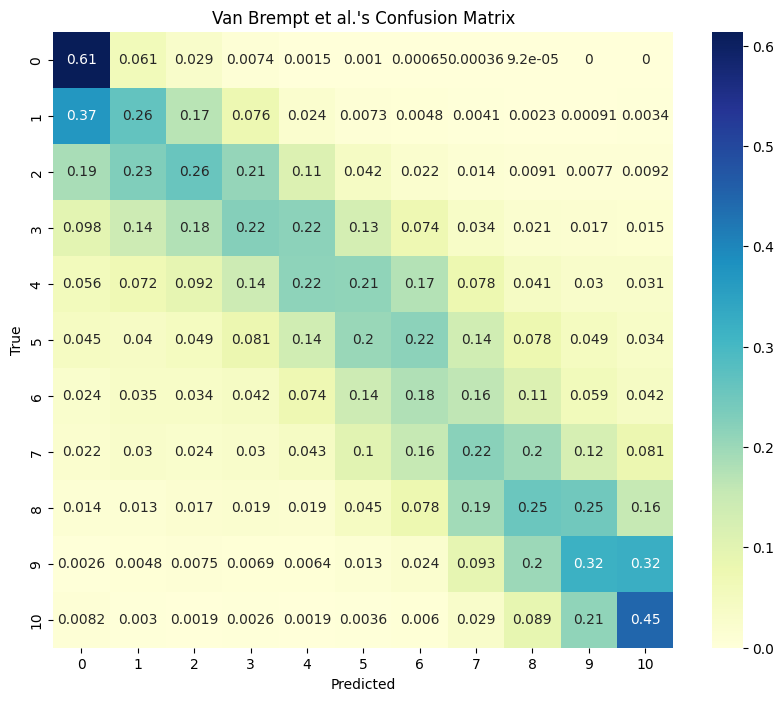

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(data, annot=True, cmap="YlGnBu")
plt.title('Van Brempt et al.\'s Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

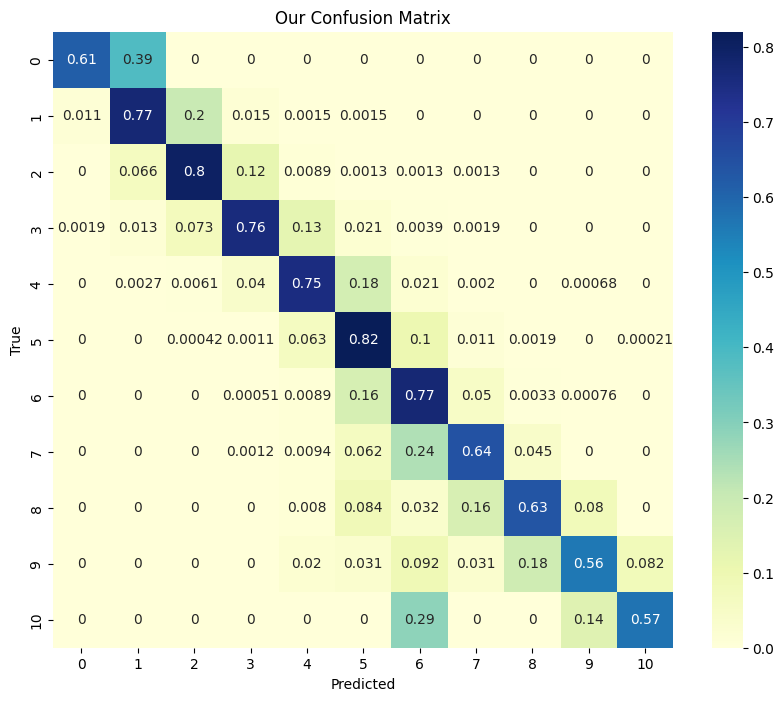

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(our_confusion_matrix, annot=True, cmap="YlGnBu")
plt.title('Our Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()